In [1]:
import numpy as np
import pandas as pd

In [2]:
import cv2

In [3]:
print cv2.__version__

3.1.0


In [4]:
df = pd.read_csv("train.csv")

In [5]:
df.shape

(42000, 785)

In [6]:
df.info

<bound method DataFrame.info of        label  pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  \
0          1       0       0       0       0       0       0       0       0   
1          0       0       0       0       0       0       0       0       0   
2          1       0       0       0       0       0       0       0       0   
3          4       0       0       0       0       0       0       0       0   
4          0       0       0       0       0       0       0       0       0   
5          0       0       0       0       0       0       0       0       0   
6          7       0       0       0       0       0       0       0       0   
7          3       0       0       0       0       0       0       0       0   
8          5       0       0       0       0       0       0       0       0   
9          3       0       0       0       0       0       0       0       0   
10         8       0       0       0       0       0       0       0       0   
11      

In [5]:
from matplotlib import pylab
%matplotlib inline

In [6]:
# from sklearn.preprocessing import StandardScaler
# scaler = StandardScaler()
X = df.ix[:,1:]
y = df.ix[:,0]
# X_train_scaled = scaler.fit_transform(X_train)

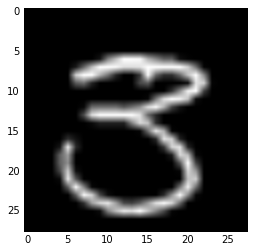

In [8]:
pylab.imshow(np.reshape(X.ix[7,:],(28,28)), cmap='gray')

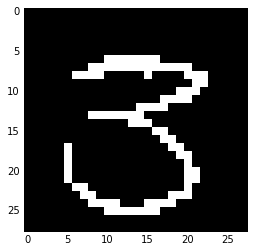

In [10]:
a = pylab.imshow(np.reshape(X_train.ix[7,:],(28,28)), cmap='gray', vmin=127, vmax=128,interpolation='nearest')

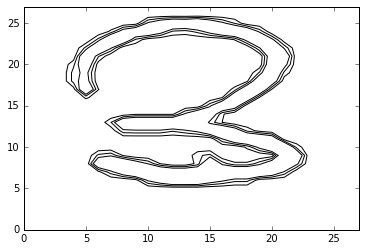

In [12]:
pylab.contour(np.reshape(X_train.ix[7,:],(28,28)),cmap='gray', vmin=127, vmax=128)

In [10]:
from sklearn import manifold

In [19]:
tsne = manifold.TSNE(n_components=2,init='random', random_state=0)
data_2d_tsne = tsne.fit_transform(X[:1000])

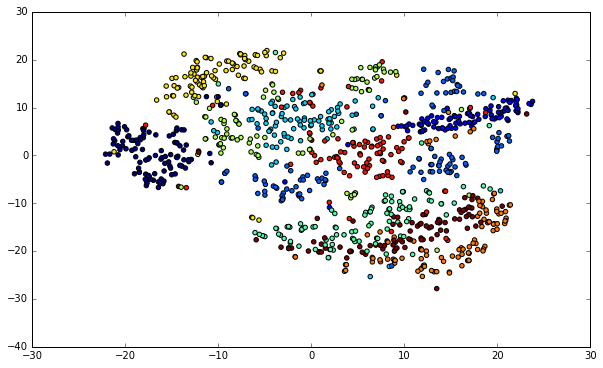

In [20]:
pylab.figure(figsize=(10, 6))
pylab.scatter(data_2d_tsne[:,0], data_2d_tsne[:,1], c = y[:1000])

In [16]:
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(n_components=2, random_state=0)
data_2d_pca = pca.fit_transform(X[:1000])

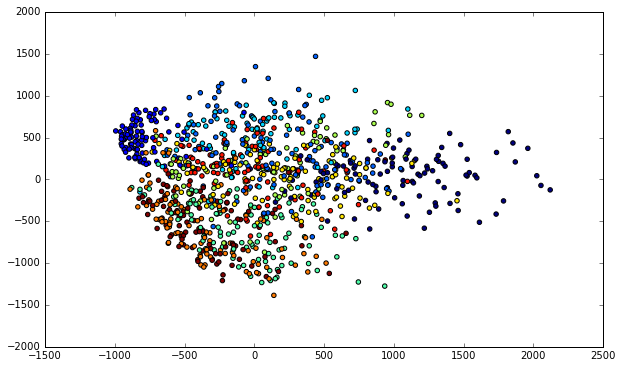

In [18]:
pylab.figure(figsize=(10, 6))
pylab.scatter(data_2d_pca[:,0], data_2d_pca[:,1], c = y[:1000])

In [22]:
mds = manifold.MDS(n_components = 2, n_init=1, max_iter=100)
data_2d_mds = mds.fit_transform(X[:1000])

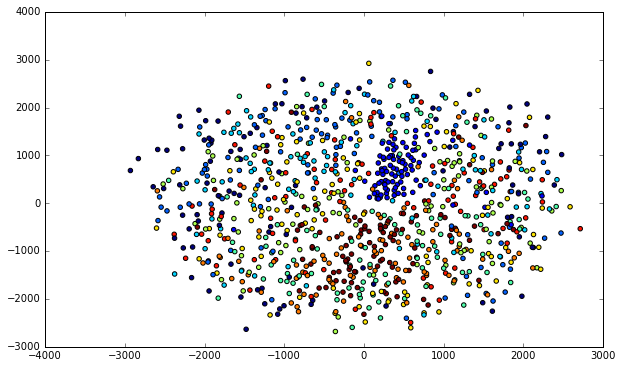

In [23]:
pylab.figure(figsize=(10, 6))
pylab.scatter(data_2d_mds[:, 0], data_2d_mds[:, 1], c = y[:1000])

(array([ 107.,   96.,  124.,   90.,  102.,   89.,   97.,  105.,   93.,   97.]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

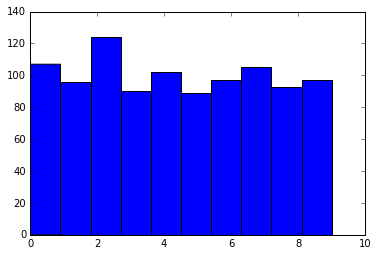

In [26]:
pylab.hist(y[:1000])

In [27]:
import pandas as pd

In [28]:
from collections import Counter

In [29]:
Counter(y[:1000])

Counter({0: 107,
         1: 96,
         2: 124,
         3: 90,
         4: 102,
         5: 89,
         6: 97,
         7: 105,
         8: 93,
         9: 97})

In [16]:
def make_bw(x):
    im = np.reshape(x, (28,28))
    im = im.astype('uint8')
    ret, res = cv2.threshold(im,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
    return np.reshape(res, (784, ))

In [68]:
X_bw = np.apply_along_axis(make_bw, 1, X[:1000])

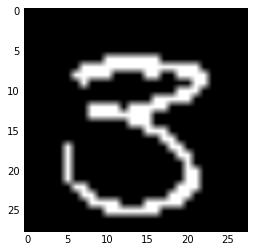

In [70]:
pylab.imshow(np.reshape(X_bw[7,:],(28,28)), cmap='gray')

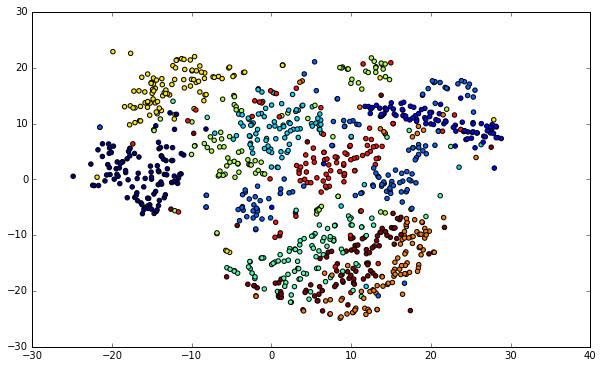

In [71]:
data_2d_tsne = tsne.fit_transform(X_bw[:1000])
pylab.figure(figsize=(10, 6))
pylab.scatter(data_2d_tsne[:,0], data_2d_tsne[:,1], c = y[:1000])

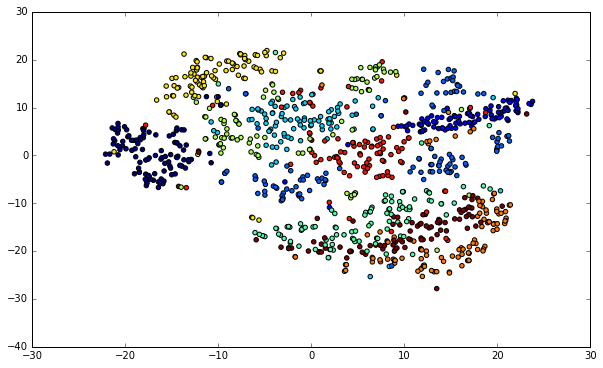

In [72]:
data_2d_tsne = tsne.fit_transform(X[:1000])
pylab.figure(figsize=(10, 6))
pylab.scatter(data_2d_tsne[:,0], data_2d_tsne[:,1], c = y[:1000])

In [74]:
np.unique(X_bw)

array([  0, 255], dtype=uint8)

In [75]:
np.unique(X)

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
kn = KNeighborsClassifier()

In [9]:
from sklearn.cross_validation import train_test_split

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=0.2, test_size=0.1, random_state=0, stratify=y)

In [11]:
kn.fit(X_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [12]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [13]:
print "Train score: %f" % (accuracy_score(y_train, kn.predict(X_train)))

Train score: 0.944312


In [14]:
print "Test score: %f" % (accuracy_score(y_test, kn.predict(X_test)))

Test score: 0.916706


In [15]:
print confusion_matrix(y_train, kn.predict(X_train))

[[205   0   0   0   0   0   2   0   0   0]
 [  0 234   0   0   0   0   0   0   0   0]
 [  1   6 193   1   1   0   0   6   1   0]
 [  0   1   2 208   0   4   0   2   1   0]
 [  0   6   0   0 185   0   2   1   0  10]
 [  1   2   0   4   1 181   1   0   0   0]
 [  1   2   0   0   0   0 204   0   0   0]
 [  0  12   0   0   0   0   0 206   0   2]
 [  1  11   2   6   0   7   2   2 172   0]
 [  1   1   1   2   4   2   0   1   1 196]]


In [17]:
X_train_bw = np.apply_along_axis(make_bw, 1, X_train)

In [18]:
kn.fit(X_train_bw, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [19]:
print "Train score: %f" % (accuracy_score(y_train, kn.predict(X_train_bw)))

Train score: 0.933365


In [20]:
X_test_bw = np.apply_along_axis(make_bw, 1, X_test)
print "Test score: %f" % (accuracy_score(y_test, kn.predict(X_test_bw)))

Test score: 0.898144


In [21]:
print confusion_matrix(y_train, kn.predict(X_train_bw))

[[205   0   0   0   0   0   2   0   0   0]
 [  0 233   0   0   0   0   0   0   0   1]
 [  2   8 191   1   1   0   0   5   1   0]
 [  0   1   2 206   0   5   0   3   1   0]
 [  0   9   0   0 179   0   2   2   0  12]
 [  3   2   0   5   2 173   3   0   0   2]
 [  0   2   0   0   0   0 205   0   0   0]
 [  0  14   0   0   1   0   0 203   0   2]
 [  1  11   4   7   1   6   1   2 169   1]
 [  2   1   1   1   5   1   0   1   0 197]]


In [22]:
from sklearn.ensemble import RandomForestClassifier

In [36]:
rf = RandomForestClassifier(n_estimators=500, random_state=0)

In [41]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [38]:
def acc_scores(x_train, x_test, y_train, y_test, cl):
    tr_pred = cl.predict(x_train)
    print "Train score: %f" % (accuracy_score(y_train, tr_pred))
    print "Test score: %f" % (accuracy_score(y_test, cl.predict(x_test)))
    print confusion_matrix(y_train, tr_pred)

In [42]:
acc_scores(X_train, X_test, y_train, y_test, rf)

Train score: 1.000000


MemoryError: 

### OPENCV

In [10]:
im = np.reshape(X_train.ix[7,:],(28,28))

In [44]:
import matplotlib.pyplot as plt
%matplotlib inline

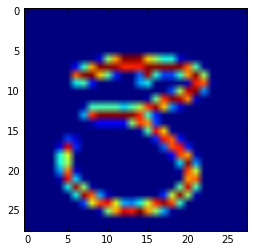

In [10]:
plt.imshow(im)

In [41]:
im_test = cv2.imread('logo2.jpg')

##### changing colors

In [12]:
cv2.startWindowThread()
cv2.namedWindow("preview")
cv2.imshow("preview", im_test)
cv2.waitKey(0)

-1

In [13]:
im_test.shape

(113L, 125L, 3L)

In [15]:
im_test_gray = cv2.cvtColor(im_test, cv2.COLOR_BGR2GRAY)

In [16]:
cv2.startWindowThread()
cv2.namedWindow("preview")
cv2.imshow("preview", im_test_gray)
cv2.waitKey(0)

-1

In [17]:
im_test_gray.shape

(113L, 125L)

In [49]:
im_test_hsv = cv2.cvtColor(im_test, cv2.COLOR_BGR2HSV)

In [50]:
im_test_hsv.shape

(113L, 125L, 3L)

In [51]:
blue = np.uint8([[[255,0,0]]])
hsv_blue = cv2.cvtColor(blue,cv2.COLOR_BGR2HSV)
hsv_blue

array([[[120, 255, 255]]], dtype=uint8)

In [55]:
lower_blue = np.array([100, 100, 100])
upper_blue = np.array([130, 255, 255])
mask = cv2.inRange(im_test_hsv, lower_blue, upper_blue)

In [56]:
res = cv2.bitwise_and(im_test_hsv, im_test_hsv, mask=mask)

In [57]:
cv2.imshow('original', im_test)
cv2.imshow('hsv', im_test_hsv)
cv2.imshow('mask', mask)
cv2.imshow('res', res)
cv2.waitKey(0)

-1

In [48]:
im_test_hsv[40:45,50:60]

array([[[108, 175, 130],
        [107, 186, 133],
        [104, 185, 127],
        [100, 176, 113],
        [100, 167, 107],
        [103, 169, 118],
        [105, 166, 120],
        [103, 123, 104],
        [ 95,  13, 253],
        [110,   3, 254]],

       [[107, 217, 166],
        [106, 230, 170],
        [104, 242, 159],
        [102, 232, 146],
        [103, 215, 141],
        [105, 217, 148],
        [106, 212, 150],
        [105, 187, 116],
        [ 90,  14, 255],
        [120,   1, 255]],

       [[106, 225, 154],
        [105, 233, 163],
        [103, 244, 159],
        [102, 241, 145],
        [104, 227, 144],
        [107, 219, 163],
        [106, 231, 160],
        [105, 192, 134],
        [ 90,  14, 255],
        [ 30,   5, 255]],

       [[105, 171, 119],
        [105, 189, 127],
        [102, 204, 129],
        [102, 195, 124],
        [105, 187, 128],
        [107, 200, 149],
        [106, 222, 153],
        [105, 175, 141],
        [ 93,  19, 255],
        [ 30,  12, 

###### geometric transformations

In [10]:
res1 = cv2.resize(im_test, None, fx=2, fy=2, interpolation=cv2.INTER_LINEAR)
res = cv2.resize(im_test, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

In [11]:
cv2.imshow("resized_lin", res1)
cv2.imshow("resized_cub", res)
cv2.waitKey(0)

-1

In [6]:
rows, cols = im_test.shape[:2]

In [7]:
M = np.float32([[1,0,50],[0,1,50]])

In [8]:
res = cv2.warpAffine(im_test, M, (cols, rows))

In [9]:
cv2.imshow("original", im_test)
cv2.imshow("translated", res)
cv2.waitKey(0)

-1

In [10]:
M = cv2.getRotationMatrix2D((cols/2, rows/2), 90, 1)
res = cv2.warpAffine(im_test, M, (cols, rows))

In [11]:
cv2.imshow("original", im_test)
cv2.imshow("rotated", res)
cv2.waitKey(0)

-1

In [42]:
im_test_gray = cv2.cvtColor(im_test, cv2.COLOR_BGR2GRAY)
ret, res = cv2.threshold(im_test_gray, 127, 255, cv2.THRESH_BINARY)
cv2.imshow("original", im_test)
cv2.imshow("blackwhite", res)
cv2.waitKey(0)

-1

In [44]:
im_test_gray[:10]

array([[255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       ..., 
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255],
       [255, 255, 255, ..., 255, 255, 255]], dtype=uint8)

In [32]:
res1 = cv2.adaptiveThreshold(im_test_gray, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 4)
res2 = cv2.adaptiveThreshold(im_test_gray, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 4)

In [34]:
cv2.imshow("original", im_test)
cv2.imshow("blackwhite", res)
cv2.imshow("blackwhite_admean", res1)
cv2.imshow("blackwhite_adgaus", res2)
cv2.waitKey(0)

-1

In [35]:
ret2, res3 = cv2.threshold(im_test_gray, 0, 255, cv2.THRESH_BINARY+cv2.THRESH_OTSU)

In [36]:
cv2.imshow("original", im_test)
cv2.imshow("blackwhite_otsu", res3)
cv2.waitKey(0)

-1

##### smoothing images

In [6]:
kernel = np.ones((5,5), np.float32)/25

In [7]:
res = cv2.filter2D(im_test, -1, kernel)

In [8]:
cv2.imshow("original", im_test)
cv2.imshow("smoothed", res)
cv2.waitKey(0)

-1

In [12]:
blur = cv2.GaussianBlur(im_test,(3,3),0)
cv2.imshow("original", im_test)
cv2.imshow("gaus_smoothed", blur)
cv2.waitKey(0)

-1

In [15]:
blur = cv2.medianBlur(im_test,3)
cv2.imshow("original", im_test)
cv2.imshow("median_smoothed", blur)
cv2.waitKey(0)

-1

In [16]:
blur = cv2.bilateralFilter(im_test,9,75,75)
cv2.imshow("original", im_test)
cv2.imshow("bilateral_smoothed", blur)
cv2.waitKey(0)

-1

##### morphological transformations

In [23]:
im_test_gray = cv2.cvtColor(im_test, cv2.COLOR_BGR2GRAY)
ret,im_test_bw = cv2.threshold(im_test_gray,0,255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
cv2.imshow("bw", im_test_bw)
cv2.waitKey(0)

-1

In [37]:
kernel = np.ones((4,4),np.uint8)

In [30]:
eroison = cv2.erode(im_test_bw, kernel, iterations=1)
cv2.imshow("original", im_test)
cv2.imshow("eroded", eroison)
cv2.waitKey(0)

-1

In [31]:
dilation = cv2.dilate(im_test_bw, kernel, iterations=1)
cv2.imshow("original", im_test)
cv2.imshow("dilated", dilation)
cv2.waitKey(0)

-1

In [38]:
opening = cv2.morphologyEx(im_test_bw, cv2.MORPH_OPEN, kernel)
cv2.imshow("original", im_test)
cv2.imshow("open", opening)
cv2.waitKey(0)

-1

In [39]:
closing = cv2.morphologyEx(im_test_bw, cv2.MORPH_CLOSE, kernel)
cv2.imshow("original", im_test)
cv2.imshow("close", closing)
cv2.waitKey(0)

-1

In [40]:
grad = cv2.morphologyEx(im_test_bw, cv2.MORPH_GRADIENT, kernel)
cv2.imshow("original", im_test)
cv2.imshow("grad", grad)
cv2.waitKey(0)

-1

In [42]:
canny = cv2.Canny(im_test, 100, 200)
cv2.imshow("original", im_test)
cv2.imshow("canny", canny)
cv2.waitKey(0)

-1

##### histogram

In [43]:
hist = cv2.calcHist([im_test_gray],[0], None, [256], [0,256])

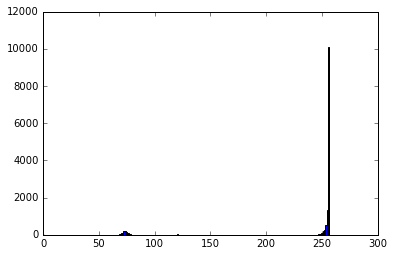

In [46]:
plt.hist(im_test_gray.ravel(), 256, [0,256]);plt.show()

In [47]:
equ = cv2.equalizeHist(im_test_gray)
cv2.imshow("equ", equ)
cv2.waitKey(0)

-1